# **Práctica Deep Learning:**

El objetivo de la práctica es tratar de predecir el precio de habitaciones de AirBnb utilizando para ello todas las características disponibles en el dataset airbnb.

Implementar un algoritmo de clasificación y otro predictivo que sea capaz de estimar el precio de las habitaciones utilizando para ello datos de distintos tipos y técnicas de Deep Learning (redes neuronales profundas).

Criterios de corrección:
-	Características utilizadas como input del modelo
-	Arquitecturas probadas y experimentos realizados
-	Procesamiento de los datos para adecuarlos al modelo
-	Explicación de los pasos realizados
-	Limpieza del código

Se pide : 

1. Clasificación de un airbnb usando los datos númericos y categóricos
2. Clasificación de un airbnb usando imágenes
3. Clasificación de un airbnb usando los datos númericos y categóricos e imágenes
4. Predecir el precio de un airbnb usando los datos númericos y categóricos
5. Predecir el precio de un airbnb usando imágenes
6. Predecir el precio de un airbnb usando los datos númericos y categóricos e imágenes



Nota Para Félix:

He distribuido el notebook de la siguiente manera.

La **sección 0** es simplemente la función que ejecuto una vez y me permite guardar las fotos en un array y guardarlo en el disco local. 
En esta sección ya he filtrado el dataset solo para aquellos registros que son realmente de Madrid, ya que sabiamos que había registros de otras ciudades.

La **sección 1**, se refiere a la limpieza de datos que he realizado en los datasets. Primero he filtrado el dataset por los registros para los que tengo imagenes.     
Después he eliminado las características basándome en mi práctica de ML. Una vez reducido la dimensionalidad, he procedido a la separacion entre los datasets de training, validation y test. 
Una vez hecho esto, inputamos los NA, analizamos outliers, normalizo los datos numericos y guardo estos valores para normalizar después en los dataset de validation y test. 
Trato las variables categóricas en training, y uso el mismo 'mapeo' para aplicar en los datasets de validation y test. 
Por ultimo guardo estos datasets transformados en un fichero de texto para acceder a ellos directamente. 

En la **sección 2** es donde realizo el pre-procesamiento para los modelos, y que es la parte en la que tendrás tu que empezar a ejecutar para poder verificar los modelos. Osea, no necesitas ejecutar nada de las dos secciones anteriores ;)

En la **sección Modelos**, es donde encuentras los seis módelos, numerados como 3,4,5,6,7 y 8. 

Y por último la **sección 9** donde esta una pequeña conclusión final.

Espero que "disfrutes" y tengas muchos comentarios de mejoras. Gracias!

# 0. Función para descargar las imágenes del dataset airbnb.
Creamos una función para guardar las imágenes(Thumbnail URL) que vamos a usar de cada registro y guardarlas en un array de Numpy para trabajar con ellas después.

In [ ]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# direccionamso la ruta a la carpeta donde estas las imagenes y el fichero .csv
%cd drive/My Drive/Colab Notebooks/PracticaDeepLearning_BeaMora

/content/drive/My Drive/Colab Notebooks/PracticaDeepLearning_BeaMora


In [ ]:
# verificamos el contenido
!ls -lah

total 2.0G
-rw------- 1 root root  58M May 16 17:17 airbnb-listings-extract.csv
-rw------- 1 root root 1.9G Jun 20 20:48 images.npy
-rw------- 1 root root 463K Jun 25 10:57 PracticaDeepLearning_BeaMora.ipynb
-rw------- 1 root root 928K Jun 22 15:10 test.csv
-rw------- 1 root root 3.1M Jun 22 15:10 train.csv
-rw------- 1 root root 562K Jun 22 15:10 val.csv
-rw------- 1 root root 104K Jun 20 20:48 was_loaded.npy


In [ ]:
# leemos el dataset con pandas y mostramos los 5 primeros registros
import pandas as pd
data = pd.read_csv('airbnb-listings-extract.csv', sep = ';', decimal='.')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

Como conozco el dataset de otras practicas, se que hay registros que no pertenecen a la ciudad de Madrid, por lo que voy a realizar un filtro inicial. 



In [ ]:
# veo el numero de registros totales, y el número tras haber aplicado el filtro a la ciudad de Madrid
df_Madrid = data[data['City']== 'Madrid']
print(f'tamaño del dataset original', data.shape)
print (f'Tamaño del dataset usando sólo los registros en los que la ciudad es Madrid: ', df_Madrid.shape)

tamaño del dataset original (14780, 89)
Tamaño del dataset usando sólo los registros en los que la ciudad es Madrid:  (13207, 89)


In [42]:
df_Madrid.head(3)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,...,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
40,6478626,https://www.airbnb.com/rooms/6478626,20170407214119,2017-04-08,Habitación con baño .,"Habitación con cama de 150 , para una o dos p...",Tranquilidad y respeto del espacio room with b...,"Habitación con cama de 150 , para una o dos p...",none,"Barrio muy bien comunicado , metro , autobús ,...",NaN,Metro conde de Casal abajo de casa . Líneas de...,"Pueden usar la nevera , microondas , wifi .",Cualquier cosa Q necesiten estaremos para ayud...,Si son fumadores podéis fumar en un patio Q h...,https://a0.muscache.com/im/pictures/86864154/1...,https://a0.muscache.com/im/pictures/86864154/1...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/86864154/1...,25709853,https://www.airbnb.com/users/show/25709853,Vílma,2015-01-06,"Madrid, Community of Madrid, Spain",NaN,within an hour,84.0,NaN,https://a0.muscache.com/im/users/25709853/prof...,https://a0.muscache.com/im/users/25709853/prof...,NaN,3.0,3.0,"email,phone,reviews","Madrid, Comunidad de Madrid 28007, Spain",NaN,Niño Jesús,Retiro,Madrid,Comunidad de Madrid,...,2,2.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Essential...",NaN,28.0,NaN,NaN,NaN,NaN,1,5,1,1125,2 weeks ago,NaN,0,3,12,240,2017-04-07,171,2015-06-14,2017-03-22,87.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,flexible,3.0,7.71,"40.4069528479,-3.6708944906","Host Has Profile Pic,Requires License,Instant ..."
41,4941335,https://www.airbnb.com/rooms/4941335,20170407214119,2017-04-08,Cómodo estudio en la calle Goya,Bonito estudio en el barrio comercial y financ...,"Este estudio, regentado por Marta y Marcos, ha...",Bonito estudio en el barrio comercial y financ...,none,NaN,NaN,NaN,En dos agradables sillones puedes tomar un caf...,Te atenderemos en todo lo que necesites. Marta...,No se permite fumar. El estudio está acondicio...,https://a0.muscache.com/im/pictures/69897767/2...,https://a0.muscache.com/im/pictures/69897767/2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/69897767/2...,25465787,https://www.airbnb.com/users/show/25465787,Marta,2015-01-01,"Madrid, Community of Madrid, Spain",NaN,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/25465787/prof...,https://a0.muscache.com/im/users/25465787/prof...,Recoletos,1.0,1.0,"email,phone,reviews","Recoletos, Madrid, Comunidad de Madrid 28001, ...",Recoletos,Recoletos,Salamanca,Madrid,Comunidad de Madrid,...,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,58.0,371.0,981.0,100.0,NaN,1,0,2,1125,6 days ago,NaN,4,9,9,15,2017-04-08,52,2015-03-02,2017-02-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,2.03,"40.4259039216,-3.6816474596","Host Has Profile Pic,Is Location Exact,Require..."
42,12510355,https://www.airbnb.com/rooms/12510355,20170407214119,2017-04-08,Studio & Terrace - Barrio Salamanc

In [ ]:
# crear el path para acceder con los datos del dataset a la URL de los 'thumbnail' que son los que vamos a usar para nuestra práctica
# guardamos la URL de la imagen y el índice para después alinearla con el registro adecuado del dataset. 
images_paths = [[i, img_url] for i, img_url in enumerate(df_Madrid['Thumbnail Url'])]

In [ ]:
# verifico la lista creada
images_paths[:5]

[[0,
  'https://a0.muscache.com/im/pictures/86864154/1356abbf_original.jpg?aki_policy=small'],
 [1,
  'https://a0.muscache.com/im/pictures/69897767/28e73423_original.jpg?aki_policy=small'],
 [2,
  'https://a0.muscache.com/im/pictures/dbcf7393-bb26-40af-ab91-aaf50ef7b380.jpg?aki_policy=small'],
 [3,
  'https://a0.muscache.com/im/pictures/59706828/afecc7d6_original.jpg?aki_policy=small'],
 [4,
  'https://a0.muscache.com/im/pictures/20e6f47e-2a1d-47ea-a814-d02e38efe8ca.jpg?aki_policy=small']]

In [ ]:
# función para descargar la imagen, y devuelve una variable que contiene el número del índice de la foto
# y la foto  

import imageio as io
import cv2


def get_image(data_url, target_size=(224, 224)):
    idx, url = data_url
    try:
        img = io.imread(url)

        # Verificamos si la imagen es B/N para convertirla a RGB
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
    except IOError as err:
        return (None, idx)

In [ ]:
import numpy as np

# cargamos en el array la imagen, con la información de sus tres canales 
loaded_images = np.zeros((len(images_paths), 224, 224, 3), dtype=np.uint8)

# con este array vamos a guardar si la carga de la imagen fue exitosa o no.
was_loaded = np.zeros(len(images_paths))

In [ ]:
# Verificamos que el tamaño de nuestro array contiene todos los registros filtrados 
print(loaded_images.shape)

(13207, 224, 224, 3)


In [ ]:
# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina

import concurrent
from tqdm import tqdm

with concurrent.futures.ProcessPoolExecutor() as executor:
    
    # Procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):
        
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images[idx] = img
            was_loaded[idx] = 1
        else:
            was_loaded[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded)}/{len(images_paths)}')

100%|██████████| 13207/13207 [29:07<00:00,  7.56it/s]

Terminado!
Total de imágenes recuperadas correctamente: 10703.0/13207


In [ ]:
# guardamos las imágenes en nuestra carpeta, vemos que recuperadas correctamente solo hya  10703! por eso guardamos el array "was_loaded"
np.save('images.npy', loaded_images)
np.save('was_loaded.npy', was_loaded)

# 1. Análisis Exploratorio
Analisis hecho en la práctica de ML donde reducimos la dimensionalidad del data set. Vamos a proceder a eliminar las columnas que no aportaban información para predecir el precio de un airbnb.

### 1.0 Filtro el dataset por el número de registros para los que obtengo imágenes

In [ ]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# direccionamso la ruta a la carpeta donde estas las imagenes y el fichero .csv
%cd drive/My Drive/Colab Notebooks/PracticaDeepLearning_BeaMora

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/PracticaDeepLearning_BeaMora'
/content/drive/My Drive/Colab Notebooks/PracticaDeepLearning_BeaMora


In [ ]:
# verificamos el contenido
!ls -lah

total 2.6G
-rw------- 1 root root  58M May 16 17:17 airbnb-listings-extract.csv
-rw------- 1 root root 700M Jun 22 11:02 Bea_Cumple.mp4
-rw------- 1 root root 1.9G Jun 20 20:48 images.npy
-rw------- 1 root root  85K Jun 23 10:28 PracticaDeepLearning_BeaMora.ipynb
-rw------- 1 root root 928K Jun 22 15:10 test.csv
-rw------- 1 root root 3.1M Jun 22 15:10 train.csv
-rw------- 1 root root 562K Jun 22 15:10 val.csv
-rw------- 1 root root 104K Jun 20 20:48 was_loaded.npy


In [ ]:
import pandas as pd
data = pd.read_csv('airbnb-listings-extract.csv', sep = ';', decimal='.')
df_Madrid = data[data['City']== 'Madrid']

In [ ]:
images_paths = [[i, img_url] for i, img_url in enumerate(df_Madrid['Thumbnail Url'])]

Primero vamos a filtrar el dataset solo con los registros que tienen foto para poder combinar y comparar los modelos de clasificación y regresión.

In [ ]:
# cargamos a variables el array que contiene todas las imágenes y el array que nos dice si el registro tiene imagen o no
import numpy as np
ims = np.load('images.npy')
idx_ims = np.load('was_loaded.npy')

In [ ]:
# nos quedamos con los datos para los que hemos podido encontrar imágenes
df_Madrid = df_Madrid[idx_ims == 1]

In [ ]:
# este dataset tiene imágenes para todos los registros
df_Madrid.shape

(10703, 89)

### 1.1 Dimensionalidad del Dataset 
Tras el análisis exploratorio en la practica de ML llegamos a la conclusión de que podemos eliminar 61 caracteríticas que no nos aportan informacionp para nuestra variable *target* Precio.

In [ ]:
# número de características que tenemos por registro
print (f' Número de característica por registro' , len(df_Madrid.columns) )
df_Madrid.columns

 Número de característica por registro 89


Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [ ]:
# características que eliminamos después de realizar los diferentes análisis en la práctica de ML
to_drop = ['Listing Url','Thumbnail Url','Medium Url','Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url',
           'Host Picture Url', 'ID', 'Scrape ID','Host ID', 'Last Scraped','Calendar last Scraped' , 'Name', 'Summary' ,
           'Space' , 'Description' , 'Experiences Offered', 'Neighborhood Overview' , 'Notes' , 'Transit' , 'Access', 
           'Interaction', 'House Rules' , 'Host Name' , 'Host About'] # 26 columns

to_drop_location = ['Street', 'City', 'State', 'Market', 'Smart Location' , 'Country Code', 'Country' , 
                    'Zipcode' , 'Geolocation', 'Host Location', 'Host Neighbourhood'] # 11 columns

to_drop_manyNA = ['Host Acceptance Rate', 'Square Feet', 'Has Availability', 'Jurisdiction Names',
                   'License', 'Weekly Price' , 'Monthly Price' ] # 7 columns


to_drop_dates= ['Calendar Updated', 'First Review' ,'Last Review'] # 3 columns

to_drop_FeaturesCorrelation = ['Availability 60' , 'Availability 90', 'Host Listings Count' ,
                   'Host Total Listings Count' , 'Beds' , 'Neighbourhood', 'Neighbourhood Cleansed'] # 7 columns

# Fase 2 - Eliminar las columnas después del primer análisis con lasso y RamdonForest
to_drop_LassoReduction = ['Host Response Time' , 'Property Type', 'Minimum Nights' , 'Maximum Nights', 
                   'Latitude' , 'Bed Type', 'Availability 365'] # 7 columns

In [ ]:
df_Madrid.drop(to_drop, inplace=True, axis=1)
df_Madrid.drop(to_drop_location, inplace=True, axis=1)
df_Madrid.drop(to_drop_manyNA, inplace=True, axis=1)
df_Madrid.drop(to_drop_dates, inplace=True, axis=1)
df_Madrid.drop(to_drop_FeaturesCorrelation , inplace= True , axis=1 )
# Fase 2 - Eliminar las columnas después del primer análisis con lasso y RamdonForest
df_Madrid.drop(to_drop_LassoReduction , inplace= True , axis=1 )

In [ ]:
len(df_Madrid.columns)

28

## 1.2 Separacion del dataset en Train, Validation y Test
Hemos eliminado las características que en la práctica de ML vimos que no tenían peso para predecir el Precio. 
    
Antes de proceder a la codificación de las características categóricas, vamos a realizar la separacion en Train, Validation y Test. 
Hacemos esto porque vamos a usar codificación basada en la media del dataset, y para evitar que haya dataleakage, necesitamos hacer la codificacion basada en los datos de train solo, para despues usar este valor cuando sea necesario en validación y test. 

In [ ]:
df_Madrid.head()

,Host Since,Host Response Rate,Host Verifications,Neighbourhood Group Cleansed,Longitude,Room Type,Accommodates,Bathrooms,Bedrooms,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Availability 30,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
40,2015-01-06,84.0,"email,phone,reviews",Retiro,-3.670894,Private room,2,2.0,1.0,"TV,Wireless Internet,Kitchen,Heating,Essential...",28.0,NaN,NaN,1,5,0,171,87.0,9.0,9.0,9.0,9.0,9.0,9.0,flexible,3.0,7.71,"Host Has Profile Pic,Requires License,Instant ..."
41,2015-01-01,100.0,"email,phone,reviews",Salamanca,-3.681647,Entire home/apt,2,1.0,0.0,"TV,Internet,Wireless Internet,Air conditioning...",58.0,100.0,NaN,1,0,4,52,96.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.0,2.03,"Host Has Profile Pic,Is Location Exact,Require..."
42,2016-04-18,100.0,"email,phone,reviews,jumio,government_id",Salamanca,-3.687155,Entire home/apt,3,1.0,0.0,"TV,Internet,Wireless Internet,Air conditioning...",70.0,150.0,30.0,2,15,7,36,87.0,9.0,9.0,10.0,10.0,10.0,9.0,flexible,1.0,3.28,"Host Has Profile Pic,Host Identity Verified,Is..."
43,2012-09-08,100.0,"email,phone,reviews",Salamanca,-3.685763,Private room,1,1.0,1.0,"Internet,Wireless Internet,Kitchen,Doorman,Ele...",26.0,NaN,NaN,1,0,14,15,95.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,7.0,0.57,"Host Has Profile Pic,Is Location Exact,Require..."
44,2013-12-25,100.0,"email,phone,linkedin,reviews,jumio",Salamanca,-3.685423,Entire home/apt,6,1.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",70.0,NaN,20.0,1,10,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,2.0,NaN,"Host Has Profile Pic,Host Identity Verified,Is..."


In [ ]:
df_Madrid.iloc[1,:]

ID                                                                          4941335
Listing Url                                    https://www.airbnb.com/rooms/4941335
Scrape ID                                                            20170407214119
Last Scraped                                                             2017-04-08
Name                                                                              1
Summary                           Bonito estudio en el barrio comercial y financ...
Space                             Este estudio, regentado por Marta y Marcos, ha...
Description                       Bonito estudio en el barrio comercial y financ...
Experiences Offered                                                            none
Neighborhood Overview                                                           NaN
Notes                                                                           NaN
Transit                                                                     

In [ ]:
from sklearn.model_selection import train_test_split

# 20% de los datos para test y 80% de los datos para training
# de training separamos 15% para validación y 85 para training
training, test = train_test_split(df_Madrid, test_size=0.2, shuffle=True, random_state=0)
train, val = train_test_split(training, test_size=0.15, shuffle=True, random_state=0)


print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de validation: {val.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# guardamos los dos grupos en ficheros csv ya que será mas facil realizar el preprocesado en ellos con pandas
train.to_csv('train.csv', sep=';', decimal='.', index=True)
val.to_csv('val.csv', sep=';', decimal='.', index=True)
test.to_csv('test.csv', sep=';', decimal='.', index=True)

Dimensiones del dataset de training: (7277, 28)
Dimensiones del dataset de validation: (1285, 28)
Dimensiones del dataset de test: (2141, 28)


Dimensiones del dataset de training: (7277, 28)      
Dimensiones del dataset de validation: (1285, 28)     
Dimensiones del dataset de test: (2141, 28)     

## 1.3 Exploracion Dataset Training

### 1.3.1 Tratamos las características numéricas
- Vamos a rellenar los NA de las columnas numéricas, usando el valor medio de su correspondiente columna.       
- Para las columnas de Security Deposit y Cleaning Fee, vamos a suponer que si no tienen valor es porque no aplica, por lo que deberían rellenarse por valor 0€.

In [ ]:
%cd drive/My Drive/Colab Notebooks/PracticaDeepLearning_BeaMora

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/PracticaDeepLearning_BeaMora'
/content/drive/My Drive/Colab Notebooks/PracticaDeepLearning_BeaMora


In [ ]:
import pandas as pd
airbnb_train = pd.read_csv('train.csv', sep=';' , decimal='.')

In [ ]:
airbnb_train.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [ ]:
# Verificamos NAs
numeric_cols = airbnb_train.columns[airbnb_train.dtypes== float].tolist()
print(airbnb_train[numeric_cols].isna().sum(axis=0))

Host Response Rate                 890
Longitude                            0
Bathrooms                           22
Bedrooms                            17
Price                                2
Security Deposit                  4265
Cleaning Fee                      3042
Review Scores Rating              1526
Review Scores Accuracy            1533
Review Scores Cleanliness         1531
Review Scores Checkin             1537
Review Scores Communication       1530
Review Scores Location            1539
Review Scores Value               1540
Calculated host listings count       0
Reviews per Month                 1469
dtype: int64


In [ ]:
airbnb_train.iloc[0,:]

Index                                                                         14543
Host Since                                                               2015-10-14
Host Response Rate                                                              NaN
Host Verifications                                                    phone,reviews
Neighbourhood Group Cleansed                                             Arganzuela
Longitude                                                                  -3.69567
Room Type                                                              Private room
Accommodates                                                                      1
Bathrooms                                                                         1
Bedrooms                                                                          1
Amenities                         Wireless Internet,Smoking allowed,Elevator in ...
Price                                                                       

In [ ]:
# para las columnas de Cleaning Fee y Security Deposit, vamos a asumir que si no tienen valor, es porque el precio es 0€
airbnb_train['Cleaning Fee'].fillna(0, inplace=True) 
airbnb_train['Security Deposit'].fillna(0, inplace=True)

In [ ]:
# ahora procedemos a reemplazar en el resto de variables numéricas, los NA por el valor media 
# para cada una de las características
for c in numeric_cols:
    if airbnb_train[c].isna != 0:
        airbnb_train[c].fillna(airbnb_train[c].mean(), inplace=True)

print(airbnb_train[numeric_cols].isna().sum(axis=0))

Host Response Rate                0
Longitude                         0
Bathrooms                         0
Bedrooms                          0
Price                             0
Security Deposit                  0
Cleaning Fee                      0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Review Scores Value               0
Calculated host listings count    0
Reviews per Month                 0
dtype: int64


### 1.3.2 Análizamos Outliers
En la visualización de la distribución de los datos de las características inicialmente númericas, vimos que la distribucion de la variable target *Price* estaba escorada hacia la izquierda y ademas presentaba outliers 

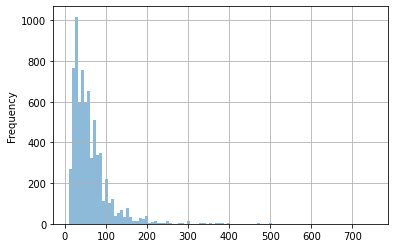

In [ ]:
airbnb_train['Price'].plot.hist(alpha=0.5, bins=100, grid = True)

In [ ]:
airbnb_train['Price'].describe()

count    7277.000000
mean       61.036564
std        50.134243
min         9.000000
25%        30.000000
50%        50.000000
75%        75.000000
max       750.000000
Name: Price, dtype: float64

Siendo la media de 50€ y sabiendo el 75% de los registros marcan 75€, considero como outliers aquellos que estén por encima de 300€

In [ ]:
# filtramos los precios de las casas como límite a 300€, probablemente tengamos mejores resultados al acotar la 
# distribución de los datos a costa de no poder estimar menos de un registro por cada 100
# este paso lo tenemos que aplicar después en val y test
f1 = airbnb_train['Price'] < 300                           # 0.78 %
Numberfiltered = airbnb_train.shape[0] - sum(f1) 
airbnb_train = airbnb_train[f1]

In [ ]:
#np.log10(airbnb_train['Price']).plot.hist(alpha=0.5, bins=100, grid = True)


### 1.3.3 Tratamos ahora las caracteríticas categóricas

In [ ]:
# mostrar las características categóricas
categorical_feature_mask = airbnb_train.dtypes==object
categorical_cols = airbnb_train.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['Host Since', 'Host Verifications', 'Neighbourhood Group Cleansed', 'Room Type', 'Amenities', 'Cancellation Policy', 'Features']


Características categóricas: 
- Host Since : Es una fecha, vamos a convertir esta variable a númerica, dónde aparezca los años que lleva el usuario como miembro de airbnb.
- Host Verifications, Amenities y Features, son columnas compuestas por conjunto de palabras. 
- Neighbourhood Group Cleanse, Room Type y Cancellation Policy muestran una categoría.

Vamos a tratarlas de forma separada.

In [ ]:
# vamos a ver cuantos valores NA hay
airbnb_train[categorical_cols].isna().sum(axis=0)

Host Since                       3
Host Verifications               3
Neighbourhood Group Cleansed     0
Room Type                        0
Amenities                       39
Cancellation Policy              0
Features                         0
dtype: int64

In [ ]:
# 1. Convertimos Host Since a númerico y transformamos la información para que nos diga los años de membership
from datetime import datetime

# primero voy a reemplazar los NA de Host Since por la moda de los registros 
airbnb_train["Host Since"].fillna(airbnb_train["Host Since"].mode()[0], inplace=True)
# guardo el valor de la moda para usarlo en validation y test
Host_since_mode = airbnb_train["Host Since"].mode()[0]

# transformar esta columna a formato fecha y poder extraer el año para calcular los años de permanencia como miembro
airbnb_train['Host Since'] = airbnb_train['Host Since'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
airbnb_train['Host Since'] = airbnb_train['Host Since'].apply(lambda x: 2020 - x.year)

In [ ]:
# 2. Para tratar las 3 caracteríticas: Host Verifications, Amenities y Features, como están compuestas de varias palabras, entendiéndose
# como número de opciones, vamos a contar el numero de opciones que tiene cada registro, dando valor a cuantas más opciones tenga, 
# mas facilidades ofrece ese airbnb. De esta forma convertimos a numéricas estas características.

# vamos a rellenar los NA con vacios, sabemoso que no hay muchos, y suponemos que si no han escrito, es porque no ofrecen ninguna opción 
airbnb_train['Host Verifications'].fillna("", inplace=True)
airbnb_train['Amenities'].fillna("", inplace=True)
             
airbnb_train['Host Verifications'] = airbnb_train['Host Verifications'].apply(lambda x: len(str(x).split(',')))
airbnb_train['Amenities'] = airbnb_train['Amenities'].apply(lambda x: len(str(x).split(',')))
airbnb_train['Features'] = airbnb_train['Features'].apply(lambda x: len(str(x).split(',')))


In [ ]:
# 3. Vamos a tratar el resto de variables categóricas: Neighbourhood Group Cleanse, Room Type y Cancellation Policy 
# creamos un dictionario que mapea la media en valor para cada una de las categorias dentro de cada caracteristica.
# realizamos la categorizacion usando el métoodo del Mean Encoder / target Encoder
categorical = ['Room Type','Cancellation Policy', 'Neighbourhood Group Cleansed']

mean_map = {}
for c in categorical:
    mean = airbnb_train.groupby(c)['Price'].mean()
    airbnb_train[c] = airbnb_train[c].map(mean)    
    mean_map[c] = mean
    
# usaremos el dictionary mean_map para después aplicarlo a val y test.


In [ ]:
airbnb_train.head(3)

,Index,Host Since,Host Response Rate,Host Verifications,Neighbourhood Group Cleansed,Longitude,Room Type,Accommodates,Bathrooms,Bedrooms,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Availability 30,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,14543,5,96.042743,2,44.162637,-3.695673,32.389659,1,1.0,1.0,11,15.0,0.0,0.0,1,0,0,0,92.071118,9.456825,9.377828,9.656794,9.676701,9.55054,9.274708,50.399692,4.0,2.150999,2
1,2542,4,96.042743,4,68.882114,-3.673956,32.389659,1,1.0,1.0,17,14.0,100.0,0.0,1,0,0,3,73.000000,8.000000,8.000000,8.000000,7.000000,9.00000,8.000000,50.399692,1.0,0.300000,4
2,991,5,93.000000,3,64.569041,-3.702863,80.138167,3,1.0,0.0,21,45.0,100.0,25.0,2,15,9,27,96.000000,10.000000,9.000000,10.000000,10.000000,10.00000,10.000000,58.728429,2.0,3.130000,2


In [ ]:
# llevamos la columna Price a la segunda columna para que sea mas fácil la separación
second_col = airbnb_train.pop('Price')
airbnb_train.insert(1, 'Price', second_col)

In [ ]:
airbnb_train.head(3)

,Index,Price,Host Since,Host Response Rate,Host Verifications,Neighbourhood Group Cleansed,Longitude,Room Type,Accommodates,Bathrooms,Bedrooms,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Availability 30,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,14543,15.0,5,96.042743,2,44.162637,-3.695673,32.389659,1,1.0,1.0,11,0.0,0.0,1,0,0,0,92.071118,9.456825,9.377828,9.656794,9.676701,9.55054,9.274708,50.399692,4.0,2.150999,2
1,2542,14.0,4,96.042743,4,68.882114,-3.673956,32.389659,1,1.0,1.0,17,100.0,0.0,1,0,0,3,73.000000,8.000000,8.000000,8.000000,7.000000,9.00000,8.000000,50.399692,1.0,0.300000,4
2,991,45.0,5,93.000000,3,64.569041,-3.702863,80.138167,3,1.0,0.0,21,100.0,25.0,2,15,9,27,96.000000,10.000000,9.000000,10.000000,10.000000,10.00000,10.000000,58.728429,2.0,3.130000,2


### 1.3.4 Guardamos el dataset training con todas las transformaciones
Guardamos dataset airbnb_train con todas las transformaciones hechas, para trabajar con el directamente sin tener que ejecutar todos los pasos de nuevo.

In [ ]:
airbnb_train.to_csv('airbnb_train.csv', sep=';', decimal='.', index=False)

### 1.3.5 Analizamos las etiquetas para nuestro target *PRICE*
Preparamos las etiquetas para nuestra variable target = *PRICE*

In [ ]:
# guardamos la variable target con la que vamos a crear las etiquetas
y_train_price = airbnb_train['Price']

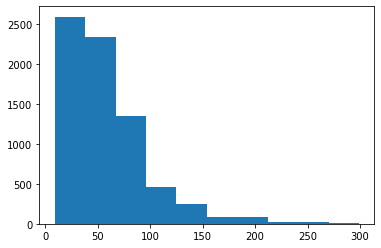

In [ ]:
# para el ejercicio de clasificación vamos ha realizar 3 grupos: (0,1,2) - barato, moderado, caro
import matplotlib.pyplot as plt
plt.hist(y_train_price, bins=10)
plt.show()

In [ ]:
y_train_class = []
for x in y_train_price:
    if x <= 40: # barato
        y_train_class.append(0)
    elif x <=90: # moderado
        y_train_class.append(1)
    else: # caro
        y_train_class.append(2)

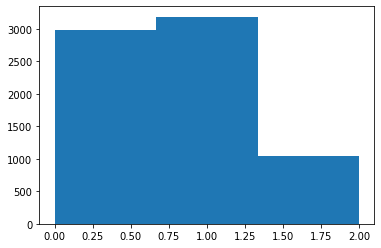

In [ ]:
# cuanto más repartido esté la distribución (más balanceado) mejor podremos predecir nuestro problema.
plt.hist(y_train_class, bins=3)
plt.show()

## 1.4 Exploracion Dataset Validation

### 1.4.1 Aplicamos transformaciones al dataset Validation

In [ ]:
airbnb_val = pd.read_csv('val.csv', sep=';' , decimal='.')
airbnb_val.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

airbnb_val['Cleaning Fee'].fillna(0, inplace=True) 
airbnb_val['Security Deposit'].fillna(0, inplace=True)

In [ ]:
for c in numeric_cols:
    if airbnb_val[c].isna != 0:
        airbnb_val[c].fillna(airbnb_train[c].mean(), inplace=True)  # valores medios del dataset Train! 

In [ ]:
airbnb_val = airbnb_val[airbnb_val['Price'] < 300 ]

In [ ]:
from datetime import datetime

# primero voy a reemplazar los NA de Host Since por la moda de los registros 
airbnb_val["Host Since"].fillna(Host_since_mode, inplace=True)

# transformar esta columna a formato fecha y poder extraer el año para calcular los años de permanencia como miembro
airbnb_val['Host Since'] = airbnb_val['Host Since'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
airbnb_val['Host Since'] = airbnb_val['Host Since'].apply(lambda x: 2020 - x.year)

In [ ]:
# vamos a rellenar los NA con vacios, sabemoso que no hay muchos, y suponemos que si no han escrito, es porque no ofrecen ninguna opción 
airbnb_val['Host Verifications'].fillna("", inplace=True)
airbnb_val['Amenities'].fillna("", inplace=True)
             
airbnb_val['Host Verifications'] = airbnb_val['Host Verifications'].apply(lambda x: len(str(x).split(',')))
airbnb_val['Amenities'] = airbnb_val['Amenities'].apply(lambda x: len(str(x).split(',')))
airbnb_val['Features'] = airbnb_val['Features'].apply(lambda x: len(str(x).split(',')))

In [ ]:
categorical = ['Room Type','Cancellation Policy', 'Neighbourhood Group Cleansed']

# categorizamos con los datos de train!
for c in categorical:
    airbnb_val[c] = airbnb_val[c].map(mean_map[c])


In [ ]:
second_col_val = airbnb_val.pop('Price')
airbnb_val.insert(1, 'Price', second_col_val)

In [ ]:
airbnb_val.values[:, 2:][0]

array([  8.        , 100.        ,   4.        ,  64.56904097,
        -3.706756  ,  32.38965912,   2.        ,   2.        ,
         1.        ,  16.        ,   0.        ,   0.        ,
         1.        ,  10.        ,   9.        ,   0.        ,
        92.05839418,   9.4560911 ,   9.37704341,   9.65703041,
         9.67688109,   9.54908821,   9.27404893,  65.2254902 ,
         1.        ,   2.15478989,   2.        ])

In [ ]:
airbnb_val.iloc[0,:]


Index                             2239.000000
Price                               45.000000
Host Since                           8.000000
Host Response Rate                 100.000000
Host Verifications                   4.000000
Neighbourhood Group Cleansed        64.569041
Longitude                           -3.706756
Room Type                           32.389659
Accommodates                         2.000000
Bathrooms                            2.000000
Bedrooms                             1.000000
Amenities                           16.000000
Security Deposit                     0.000000
Cleaning Fee                         0.000000
Guests Included                      1.000000
Extra People                        10.000000
Availability 30                      9.000000
Number of Reviews                    0.000000
Review Scores Rating                92.058394
Review Scores Accuracy               9.456091
Review Scores Cleanliness            9.377043
Review Scores Checkin             

### 1.4.2 Guardamos el dataset airbnb_val

In [ ]:
airbnb_val.to_csv('airbnb_val.csv', sep=';', decimal='.', index=False)

## 1.5 Exploracion Dataset Test

### 1.5.1 Aplicamos transformaciones al dataset test

In [ ]:
airbnb_test = pd.read_csv('test.csv', sep=';' , decimal='.')
airbnb_test.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

airbnb_test['Cleaning Fee'].fillna(0, inplace=True) 
airbnb_test['Security Deposit'].fillna(0, inplace=True)

In [ ]:
for c in numeric_cols:
    if airbnb_test[c].isna != 0:
        airbnb_test[c].fillna(airbnb_train[c].mean(), inplace=True)  # valores medios del dataset Train! 

In [ ]:
airbnb_test = airbnb_test[airbnb_test['Price'] < 300 ]

In [ ]:
from datetime import datetime

# primero voy a reemplazar los NA de Host Since por la moda de los registros 
airbnb_test["Host Since"].fillna(Host_since_mode, inplace=True)

# transformar esta columna a formato fecha y poder extraer el año para calcular los años de permanencia como miembro
airbnb_test['Host Since'] = airbnb_test['Host Since'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
airbnb_test['Host Since'] = airbnb_test['Host Since'].apply(lambda x: 2020 - x.year)

In [ ]:
# testos a rellenar los NA con testios, sabemoso que no hay muchos, y suponemos que si no han escrito, es porque no ofrecen ninguna opción 
airbnb_test['Host Verifications'].fillna("", inplace=True)
airbnb_test['Amenities'].fillna("", inplace=True)
             
airbnb_test['Host Verifications'] = airbnb_test['Host Verifications'].apply(lambda x: len(str(x).split(',')))
airbnb_test['Amenities'] = airbnb_test['Amenities'].apply(lambda x: len(str(x).split(',')))
airbnb_test['Features'] = airbnb_test['Features'].apply(lambda x: len(str(x).split(',')))

In [ ]:
categorical = ['Room Type','Cancellation Policy', 'Neighbourhood Group Cleansed']

# categorizamos con los datos de train!
for c in categorical:
    airbnb_test[c] = airbnb_test[c].map(mean_map[c])


In [ ]:
second_col_test = airbnb_test.pop('Price')
airbnb_test.insert(1, 'Price', second_col_test)

In [ ]:
airbnb_test.values[:, 2:][0]

array([  4.        , 100.        ,   6.        ,  64.56904097,
        -3.70369716,  80.13816715,   3.        ,   1.        ,
         1.        ,  18.        ,   0.        ,   7.        ,
         1.        ,   0.        ,   6.        ,  41.        ,
        86.        ,   9.        ,   8.        ,   9.        ,
         9.        ,  10.        ,   9.        ,  65.2254902 ,
         2.        ,   6.31      ,   4.        ])

In [ ]:
airbnb_test.iloc[0,:]

Index                             13347.000000
Price                                60.000000
Host Since                            4.000000
Host Response Rate                  100.000000
Host Verifications                    6.000000
Neighbourhood Group Cleansed         64.569041
Longitude                            -3.703697
Room Type                            80.138167
Accommodates                          3.000000
Bathrooms                             1.000000
Bedrooms                              1.000000
Amenities                            18.000000
Security Deposit                      0.000000
Cleaning Fee                          7.000000
Guests Included                       1.000000
Extra People                          0.000000
Availability 30                       6.000000
Number of Reviews                    41.000000
Review Scores Rating                 86.000000
Review Scores Accuracy                9.000000
Review Scores Cleanliness             8.000000
Review Scores

### 1.5.2 Guardamos el dataset airbnb_test

In [ ]:
airbnb_test.to_csv('airbnb_test.csv', sep=';', decimal='.', index=False)

# 2 Prepocesamiento para los módelos

### 2.1 Preparamos las etiquetas de la variable PRICE

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

%cd drive/My Drive/Colab Notebooks/PracticaDeepLearning_BeaMora

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/PracticaDeepLearning_BeaMora


In [2]:
# cargamos el dataset con todas las transformaciones
import pandas as pd
airbnb_train= pd.read_csv('airbnb_train.csv', sep = ';', decimal='.')
airbnb_val= pd.read_csv('airbnb_val.csv', sep = ';', decimal='.')
airbnb_test= pd.read_csv('airbnb_test.csv', sep = ';', decimal='.')

In [3]:
# guardamos la variable target con la que vamos a crear las etiquetas
y_train_price = airbnb_train['Price']

y_train_class = []
for x in y_train_price:
    if x <= 40: # barato
        y_train_class.append(0)
    elif x <=90: # moderado
        y_train_class.append(1)
    else: # caro
        y_train_class.append(2)

In [4]:
# creamos las etiquetas para el dataset de validation
# convertimos a onehot la variable PRICE para el dataset de validation
y_val_price = airbnb_val['Price']

y_val_class = []
for x in y_val_price:
    if x <= 40: # barato
        y_val_class.append(0)
    elif x <=90: # moderado
        y_val_class.append(1)
    else: # caro
        y_val_class.append(2)


In [5]:
# creamos las etiquetas para el dataset de test
# convertimos a onehot la variable PRICE para el dataset de test
y_test_price = airbnb_test['Price']

y_test_class = []
for x in y_test_price:
    if x <= 40: # barato
        y_test_class.append(0)
    elif x <=90: # moderado
        y_test_class.append(1)
    else: # caro
        y_test_class.append(2)

### 2.2 Convertimos nuestro target a onehot para realizar clasificación

In [6]:
# convertimos a one-hot la variable y_price después de haber hecho la distribución en 3 clases
from sklearn.preprocessing import LabelBinarizer
y_trainBinarizer= LabelBinarizer().fit(y_train_class)
y_train_price_onehot = y_trainBinarizer.transform(y_train_class)

In [7]:
y_valBinarizer= LabelBinarizer().fit(y_val_class)
y_val_price_onehot = y_valBinarizer.transform(y_val_class)

In [8]:
y_testBinarizer= LabelBinarizer().fit(y_test_class)
y_test_price_onehot = y_testBinarizer.transform(y_test_class)

In [22]:
# verificamos resultado
#y_train_price_onehot

### 2.3 Normalizamos los datos

In [9]:
# normalizamos
from sklearn.preprocessing import MinMaxScaler

# solo me quedo con los valores del dataset, dejando fuera la columna Index y Price
X_train = airbnb_train.values[:, 2:]

# MinMax escala cada columna de valor continuo en el rango [0,1]
# este mismo escalado es el que tengo que usar para validation y test
cs = MinMaxScaler()
X_train = cs.fit_transform(X_train)

In [12]:
# verificamos resultado
#X_train

Aplicamos transformaciones al dataset de validación y test

In [10]:
# cargamos el dataset con todas las transformaciones
X_val = cs.transform(airbnb_val.values[:, 2:])
X_test = cs.transform(airbnb_test.values[:, 2:])

# Modelos

---



# 3 Modelo Clasificación de registros según precio (barato, moderado, caro) usando valores numéricos y categóricos



### 3.1 Búsqueda de hyperparámetros
Vamos a realizar una búsqueda de hyperparámetros para encontrar los valores óptimos que hacen nuestra modelo responder con mas precisión. 
Vamos a centrarnos en los siguientes hyperparámetros:

- **Función de activacion** - es la función que incorpora la no linealidad en mi red neuronal que permite crear una funcion de coste total más compleja y ajustada para realizar una buena representación de mis datos.
- **Tamaño del batch** - hace referencia al tamaño de instancias del dataset de training que uso en una iteración.  
- **Learning rate** - es la velocidad con la que mi función de pérdidas busca el mínimo. 




In [17]:
#%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [13]:
import tensorflow as tf
tf.__version__

'2.2.0'

Relizamos la búsqueda con la librería hyperopt que nos permite hacer una búsqueda aleatoria de parámetros.     
Aunque Gridsearch realiza una búsqueda mas exhaustiva y ordenada de los hyperparámetros, hyperopt es más rápida y ha sido probada como una técnica efectiva. 

In [ ]:
# Ya esta instalado
#!pip install networkx==1.11 # para instala hyperopt correctamente, si no, da errores
#!pip install hyperopt

In [25]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import numpy as np
import sys
import time

params = { 
    'batch_size': hp.choice('batch_size', [16, 32, 64, 128]),
    'lr': hp.choice('lr',[0.01, 0.001, 0.0001]),
    'activation': hp.choice('activation',['relu',
                                                'sigmoid',
                                                'tanh',
                                                'linear'])}

def my_DN(params):
  print ('Parameters: ', params)
  
  # creamos la estructura de nuestro modelo
  model = Sequential()

  model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
  model.add(Dense(32, activation="relu"))
  model.add(Dense(16, activation="relu"))

  # esta ultima capa es la que se encarga de hacer la clasificación a las tres
  # clases que hemos definido : barato, moderado, caro
  model.add(Dense(3, activation='softmax'))

  # compilamos el modelo
  # usamos gradiente: Adam y función de pérdidas : categorical_crossentropy para clasificación
  opt = Adam(lr=params['lr'], decay=1e-6)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # entrenamos el modelo
  print("[INFO] training model...")
  history = model.fit(X_train, y_train_price_onehot,
            validation_data=(X_val, y_val_price_onehot),
            epochs=10,
            batch_size=params['batch_size'],
            verbose=0)
  
  best_epoch_loss = np.argmin(history.history['val_loss'])
  best_val_loss = np.min(history.history['val_loss'])
  best_val_acc = np.max(history.history['val_accuracy'])
  
  print('Epoch {} - val acc: {} - val loss: {}'.format(best_epoch_loss, best_val_acc, best_val_loss))
  sys.stdout.flush()
  
  return {'loss': best_val_loss, 'best_epoch': best_epoch_loss, 'eval_time': time.time(), 'status': STATUS_OK, 'model': model, 'history': history}

trials = Trials()
best = fmin(my_DN, params, algo=tpe.suggest, max_evals=10, trials=trials)
print(best)

Parameters: 
{'activation': 'sigmoid', 'batch_size': 64, 'lr': 0.01}
[INFO] training model...
Epoch 8 - val acc: 0.8025078177452087 - val loss: 0.5047664046287537
Parameters: 
{'activation': 'linear', 'batch_size': 32, 'lr': 0.01}
[INFO] training model...
Epoch 9 - val acc: 0.8025078177452087 - val loss: 0.5057050585746765
Parameters: 
{'activation': 'tanh', 'batch_size': 64, 'lr': 0.0001}
[INFO] training model...
Epoch 9 - val acc: 0.7703761458396912 - val loss: 0.5826961994171143
Parameters: 
{'activation': 'tanh', 'batch_size': 16, 'lr': 0.01}
[INFO] training model...
Epoch 6 - val acc: 0.8032915592193604 - val loss: 0.5080834031105042
Parameters: 
{'activation': 'relu', 'batch_size': 128, 'lr': 0.01}
[INFO] training model...
Epoch 7 - val acc: 0.8040752410888672 - val loss: 0.5125411152839661
Parameters: 
{'activation': 'tanh', 'batch_size': 64, 'lr': 0.001}
[INFO] training model...
Epoch 6 - val acc: 0.797805666923523 - val loss: 0.5180428624153137
Parameters: 
{'activation': 'sig

Una vez obtenidos los parámetros óptimos: 
- Función de activación : sigmoid
- Batch size : 64
- learning rate : 0.01


Son muchos los documentos que aconsejan utilizar una función de activación Relu, entre otras cosas porque esta función de activación no activa todas las neuronas al mismo tiempo, por lo que previene overfitting.      
Además analizando las perdidas del módelo vemos que el segundo mejor resultado de nuestra prueba hyperopt es con Relu, Batch size :128 y lr = 0.01      

El batch size y learning rate están intímamente ligados. Cuanto mayor sea el batch size, mayor será el learning rate, ya que hay mas confianza en como se realiza el descenso en un batch mayor que más pequeño.

A partir de aqui probé el modelo cambiando batch size entre 32, 64 y 128 , y learning rate entre 0.01 y 0.001
De todos los resultados, busque aquel que tuviese un error mas pequeño para el dataset de validación. 
Haciendo pruebas, la función de pérdidas era menor con batch size = 32 y lr = 0.001 . Me decanto por esta elección también por capacidades de la memoria RAM y porque al se introduce algo mas de ruido, que como vemos me puede permitir generalizar mejor.

Como algoritmo de optimización, vamos a usar ADAM con learning decay. Es decir que no solo aplicamos un lr fijo de 0.001 sino que vamos disminuyendo en un factor learning decay de 1e-6. 

En el modelo, para definir la estructura de capas, hemos probado con dos y tres capas, siendo esta última la que mejor resultados ha dado. 

Para la función de pérdidas en la clasificación de datos, usamos "categorical cross entropy" y la métrica para medir el módelo "accuracy" , que nos dice el número de predicciones correctas dividido entre el total de predicciones totales. Por esta razón, buscamos tener un valor de accuracy alto, sin llegar al 99% que podría ser un indicativo de overfitting, ya que el modelo es muy bueno al predecir con los datos de training, pero es probable que no lo sea tanto cuando reciba una instancia que nunca ha visto. 




### 3.2 Probar en test el modelo con los mejores parámetros 

In [17]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# creamos la estructura de nuestro modelo
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))

# esta ultima capa es la que se encarga de hacer la clasificación a las tres
# clases que hemos definido : barato, moderado, caro
model.add(Dense(3, activation='softmax'))

# compilamos el modelo
# usamos gradiente: Adam y función de pérdidas : categorical_crossentropy
opt = Adam(lr=1e-3, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# entrenamos el modelo
print("[INFO] training model...")
history = model.fit(X_train, y_train_price_onehot,
          validation_data=(X_val, y_val_price_onehot),
          epochs=100,
          batch_size=32)


[INFO] training model...
Epoch 1/100
226/226 [==============================] - 1s 5ms/step - loss: 0.7762 - accuracy: 0.6868 - val_loss: 0.6228 - val_accuracy: 0.7445
Epoch 2/100
226/226 [==============================] - 1s 4ms/step - loss: 0.5821 - accuracy: 0.7711 - val_loss: 0.5620 - val_accuracy: 0.7735
Epoch 3/100
226/226 [==============================] - 1s 4ms/step - loss: 0.5501 - accuracy: 0.7846 - val_loss: 0.5349 - val_accuracy: 0.7923
Epoch 4/100
226/226 [==============================] - 1s 4ms/step - loss: 0.5325 - accuracy: 0.7878 - val_loss: 0.5250 - val_accuracy: 0.7986
Epoch 5/100
226/226 [==============================] - 1s 4ms/step - loss: 0.5241 - accuracy: 0.7956 - val_loss: 0.5159 - val_accuracy: 0.8009
Epoch 6/100
226/226 [==============================] - 1s 4ms/step - loss: 0.5135 - accuracy: 0.7981 - val_loss: 0.5184 - val_accuracy: 0.8033
Epoch 7/100
226/226 [==============================] - 1s 4ms/step - loss: 0.5100 - accuracy: 0.7974 - val_loss: 0.51

In [18]:
# evaluamos el modelo
train_sc = model.evaluate(X_train, y_train_price_onehot, verbose=0)
test_sc = model.evaluate(X_test, y_test_price_onehot, verbose=0)
print('Accuracy --> Train: %.3f, Test: %.3f' % (train_sc[1], test_sc[1]))
print('Loss --> Train: %.3f, Test: %.3f' % (train_sc[0], test_sc[0]))

Accuracy --> Train: 0.850, Test: 0.816
Loss --> Train: 0.370, Test: 0.518


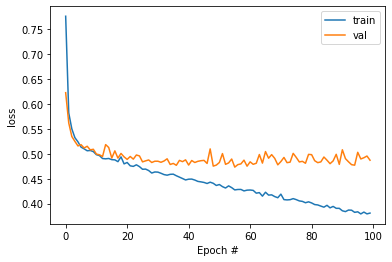

In [19]:
import matplotlib.pyplot as plt
# plot training history

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("Epoch #")
plt.ylabel("loss")
plt.legend()
plt.show()

Vemos que la tendencia de la función de pérdidas es de disminuir cuantas mas épocas usamos (cuanto más entrenamos el modelo). Sin embargo no conseguimos bajar la función de pérdidas para el dataset de test, mientras que sigue bajando para el dataset de training. Esto podria indicar que si seguimos entrenando con mas épocas o reducimos el batch size, podemos caer en overfitting. 

Viendo estos resultados, presentaría un módelo usando epoch = 50 que computacionalmente va ser menos costoso, y nos va a dar el mismo resultado.

### 3.3 Conclusiones

Predecimos la clasificación de un registro de airbnb con un 80,5 %. Esto quiere decir que 1 de cada 5 clasificaciones está equivocada. 

Contamos con 27 características para realizar esta clasificación, entre ellas el número de personas, número de baños, tipo de habitación, longitud (localización). Son caracteristicas potenciales, no entanto no dan tan buenos resultados como esperábamos. 
Hay una característica que hemos desechado por el número de NA que tiene, que dice los metros cuadrados del alojamiento, y que sin duda podria haber tenido un peso importante.  



**Mejoras:**
- Podríamos incluir mas características del dataset para ver si el modelo mejora.
- Podriamos incluir mas capas, y disminuir el batch size para ver si el modelo es capaz de aprender mas peculiaridades del dataset (sin caer en overfitting...).


# 4  Modelo Regresión usando valores numéricos y categóricos

### 4.1 Búsqueda de hyperparámetros

Para realizar la regresión vamos a normalizar el precio de los airbnb con el valor máximo de precio del dataset de training. Usaremos este valor medio para normalizar los valores en los otros dos datasets (validation y test). De esta forma nos aseguramos que el módelo funcione mejor.

In [33]:
# vamos a escalar nuestra variable Price para los tres grupos usando el valor máximo de   
# los precios que hay en el dataset de training
maxPrice = y_train_price.max()

y_train = y_train_price / maxPrice
y_val = y_val_price / maxPrice
y_test = y_test_price / maxPrice

Realizamos la búsqueda de hyperparámetros:

In [79]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

params = { 
    'batch_size': hp.choice('batch_size', [16, 32, 64, 128]),
    'lr': hp.choice('lr',[0.01, 0.001, 0.0001]),
    'activation': hp.choice('activation',['relu',
                                                'sigmoid',
                                                'tanh',
                                                'linear'])}

def my_DN(params):
  print ('Parameters: ', params)
  
  # creamos la estructura de nuestro modelo
  model = Sequential()

  model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
  model.add(Dense(32, activation="relu"))
  model.add(Dense(16, activation="relu"))

  # en regresión la ultima capa es lineal con una neurona para predecir el resultado
  model.add(Dense(1, activation='linear'))

  # compilamos el modelo
  # usamos gradiente: Adam y función de pérdidas : mean absolute percentage error 
  #opt = Adam(lr=1e-2, decay=1e-6)
  opt = Adam(lr=params['lr'], decay=1e-6)
  model.compile(loss='mean_absolute_percentage_error', optimizer=opt)

  # entrenamos el modelo
  print("[INFO] training model...")
  history = model.fit(X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=100,
            batch_size=params['batch_size'],
            verbose=0)
  
  best_epoch_loss = np.argmin(history.history['val_loss'])
  best_val_loss = np.min(history.history['val_loss'])
  
  
  print('Epoch {} - val loss: {}'.format(best_epoch_loss, best_val_loss))
  sys.stdout.flush()
  
  return {'loss': best_val_loss, 'best_epoch': best_epoch_loss, 'eval_time': time.time(), 'status': STATUS_OK, 'model': model, 'history': history}

trials = Trials()
best = fmin(my_DN, params, algo=tpe.suggest, max_evals=10, trials=trials)
print(best)

Parameters: 
{'activation': 'relu', 'batch_size': 128, 'lr': 0.01}
[INFO] training model...
Epoch 90 - val loss: 21.440494537353516
Parameters: 
{'activation': 'relu', 'batch_size': 128, 'lr': 0.01}
[INFO] training model...
Epoch 74 - val loss: 21.499881744384766
Parameters: 
{'activation': 'relu', 'batch_size': 64, 'lr': 0.01}
[INFO] training model...
Epoch 89 - val loss: 21.623470306396484
Parameters: 
{'activation': 'sigmoid', 'batch_size': 64, 'lr': 0.001}
[INFO] training model...
Epoch 93 - val loss: 21.418241500854492
Parameters: 
{'activation': 'linear', 'batch_size': 16, 'lr': 0.0001}
[INFO] training model...
Epoch 90 - val loss: 22.121599197387695
Parameters: 
{'activation': 'linear', 'batch_size': 32, 'lr': 0.0001}
[INFO] training model...
Epoch 97 - val loss: 22.318166732788086
Parameters: 
{'activation': 'tanh', 'batch_size': 16, 'lr': 0.0001}
[INFO] training model...
Epoch 96 - val loss: 22.37027931213379
Parameters: 
{'activation': 'relu', 'batch_size': 128, 'lr': 0.001}


Siguiendo la misma lógica que en el caso de clasificación, probamos con función de activación RELU, ya que la función de sigmoid está más orientada a predecir probabilidades entre 0 y 1. 

Después de varias pruebas, volvemos a ver mejores resultados con fnción de activacion: Relu , batch size: 32 y lr = 0.001

### 4.2 Probar en test el modelo con los mejores parámetros 

In [34]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# creamos la estructura de nuestro modelo
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))

# esta ultima capa tiene que devolvernosun solo valor que es el resultado de nuestra predicción
model.add(Dense(1, activation="linear"))

# compilamos el modelo
# usamos gradiente: Adam y función de pérdidas : mean absolute percentage error
opt = Adam(lr=1e-3, decay=1e-6)
model.compile(loss='mean_absolute_percentage_error', optimizer=opt) 

# entrenamos el modelo
print("[INFO] training model...")
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=100,
          batch_size=32)



[INFO] training model...
Epoch 1/100
226/226 [==============================] - 1s 4ms/step - loss: 30.2471 - val_loss: 26.2016
Epoch 2/100
226/226 [==============================] - 1s 3ms/step - loss: 26.0185 - val_loss: 24.4297
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 25.4744 - val_loss: 23.9199
Epoch 4/100
226/226 [==============================] - 1s 3ms/step - loss: 24.9623 - val_loss: 23.7766
Epoch 5/100
226/226 [==============================] - 1s 3ms/step - loss: 25.2343 - val_loss: 24.7651
Epoch 6/100
226/226 [==============================] - 1s 3ms/step - loss: 24.1865 - val_loss: 23.7393
Epoch 7/100
226/226 [==============================] - 1s 3ms/step - loss: 24.3081 - val_loss: 26.0221
Epoch 8/100
226/226 [==============================] - 1s 3ms/step - loss: 24.7524 - val_loss: 24.8583
Epoch 9/100
226/226 [==============================] - 1s 3ms/step - loss: 24.0160 - val_loss: 23.0749
Epoch 10/100
226/226 [==========================

In [44]:
import numpy as np

# realizamos la predición para los datos de test
preds = model.predict(X_test)

# calculamos la diferencia entre la columna precio del dataset de test y el valor predicho
# calculamos el porcentage de diferencia, y nos quedamos con el valor absoluto
diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)

# calculamos la media y la desviación estándar de los porcentages
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] avg. precio casa: €{}, std precio casa: €{}".format(
	(airbnb_train["Price"].mean()),	(airbnb_train["Price"].std())))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))
print("[INFO] se predice con un error de +/-: €{:.2f} ".format(np.mean(np.abs(diff))*maxPrice))

[INFO] avg. precio casa: €58.41801566858002, std precio casa: €39.78126723504344
[INFO] mean: 22.04%, std: 18.91%
[INFO] se predice con un error de +/-: €14.51 


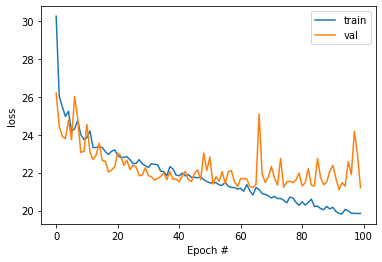

In [45]:
import matplotlib.pyplot as plt
# plot training history

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("Epoch #")
plt.ylabel("loss")
plt.legend()
plt.show()

### 4.3 Conclusiones

En comparación con las prácticas anteriores tenemos muy buenos resultados (la media de variación en el precio llegaba a un 50%)-

**Mejoras**:
- Como hemos visto antes la variable target PRICE está muy escorada en la izquierda. Si aplicamos un log10 , la distribución se parece mas a una gausiana, que puede mejorar el resultado.
- Considero que la caracteristica de Square meters que hemos imputado por falta de valores, puede tener un peso importante.
- Se podría probar a añadir mas características.
- Se podría probar a hacer alguna transformación de las características que tienen mas peso, por ejemplo analizando sus histograma y viendo si siguen todas una distribución gausiana. 
- Se podría probar con mas capas.**bold text**


# 5 Clasificación por precio (barato, moderado, caro) usando imágenes


### 5.1 Preprocesado de las imágenes

In [11]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [12]:
import numpy as np
ims = np.load('images.npy')
idx_ims = np.load('was_loaded.npy')

In [13]:
# Me quedo con las imágenes que fueron procesadas correctamente
ims = ims[idx_ims == 1]

In [14]:
# Al realizar el filtro por los airbnb solo en Madrid, antes de hacer la separación entre train, val y test, los índices dejaron de ser 
# correlativos en el dataset de airbnb. Sin embargo los índices de las imágenes se guardaron siguieron un índice ordinal. 
# He realizado un mapeado del nuevo indice con el índice de las imágenes, para no tener que guardar de nuevo las fotos. 
# Lo ideal hubiese sido cambiar el índice en el dataset antes de hacer la separacion entre train, val y test. 

import pandas as pd
data = pd.read_csv('airbnb-listings-extract.csv', sep = ';', decimal='.')
df_Madrid = data[data['City']== 'Madrid']
df_Madrid = df_Madrid[idx_ims == 1]
filtered_idx = df_Madrid.index.values.tolist()

In [15]:
# para el dataset de training, obtengo el dataset de imágenes correspondiente
train_list = airbnb_train['Index'].values.tolist()

idx_train_im = []
for i in range(0, len(train_list)):
  idx_train_im.append(filtered_idx.index(train_list[i]))

ims_train = ims[idx_train_im]

In [16]:
# para el dataset de val, obtengo el dataset de imágenes correspondiente
val_list = airbnb_val['Index'].values.tolist()

idx_val_im = []
for i in range(0, len(val_list)):
  idx_val_im.append(filtered_idx.index(val_list[i]))

ims_val = ims[idx_val_im]

In [17]:
# para el dataset de test, obtengo el dataset de imágenes correspondiente
test_list = airbnb_test['Index'].values.tolist()

idx_test_im = []
for i in range(0, len(test_list)):
  idx_test_im.append(filtered_idx.index(test_list[i]))

ims_test = ims[idx_test_im]

In [15]:
# comprobamos el valor máximo del array
#np.amax(ims_test)

In [19]:
# google colaborative se bloquea al realizar este calculo

#ims_train = ims_train/255.0
#ims_val = ims_val/255.0
#ims_test = ims_test /255.0

In [18]:
# reducimos el data set a 2000 registros para train 
ims_train2000 = ims_train[0:2000]
ims_train2000 = ims_train2000 / 255.0
y_train_price_onehot2000 = y_train_price_onehot [0:2000]

In [20]:
# el 15% de 2000 es 300 para validacion 
ims_val300 = ims_val[0:300]
ims_val300 = ims_val300 /255.0
y_val_price_onehot300 = y_val_price_onehot [0:300]

In [19]:
# el 20% para test es 400 
ims_test400 = ims_test[0:400]
ims_test400 = ims_test400 / 255.0
y_test_price_onehot400 = y_test_price_onehot [0:400]

Hemos tenido que reducir el número del dataset de imágenes porque la memoria RAM no podía gestionar toda la parte computacional.

### 5.2 Búsqueda de hyperparámetros


Para este análisis introducimos las redes convolucionales. Cada bloque de red convolucional está formado por la capa convolucional, Batch Normalization (una forma de normalizar los datos, para que haya una menor variabilidad, y el cálculo sea mas fácil y rápido) , la función de activación y por último añadimos una capa de MaxPooling para realizar un submuestreo, osea reducir el tamaño de nuestra instancia.      

Tras estos bloques, introducimos la capa de clasificación.

Desafortunadamente se queda bloqueado el google colaborative intentando realizar estos cálculos, por lo que he optado a hacer pruebas a "fuerza mayor".

- He probado el modelo con 3 capas. El resultado fue :     
loss: 0.0433 - accuracy: 0.9925 - val_loss: 1.9894 - val_accuracy: 0.4300    
Aumentando el número de épocas, aumenta el acc en training pero no en validation (cuando no se queda colgado el google colab). 

- He probado a añadir dropout para cada capa con valor de 0.3 :  
loss: 0.1303 - accuracy: 0.9535 - val_loss: 2.3977 - val_accuracy: 0.4667

- He cambiado el valor de drop out a 0.5 :     
loss: 0.6752 - accuracy: 0.6970 - val_loss: 1.1057 - val_accuracy: 0.5100

- He usado sólo drop out de valor 0.5 en la capa de clasificación:    
loss: 0.2357 - accuracy: 0.8970 - val_loss: 1.7030 - val_accuracy: 0.4733

- He añadido un bloque más para ver si mas complejidad podría ayudar a sacar más información útil de las imágenes:    
loss: 0.2222 - accuracy: 0.9240 - val_loss: 1.4724 - val_accuracy: 0.4900


Añadiendo drop out con valor 0.3 , todavia sigue habiendo overfitting. Cuando cambio el valor a 0.5 el acc de train baja bastante, mejorando un poco el de validation.     
Decidí probar a dejar solo el drop out en la última capa, y los resultados me parecieron mas aceptables. 
Por último añadí un cuarto bloque convolucional para ver si mejoraba el resultado, y no fue así. 

Por lo de estos principales experimentos (y otros tantos que no reporto), me quedo con el módelo que tiene tres bloques convolucionales, y drop out en la última capa.





In [ ]:

# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import numpy as np
import sys
import time


params = {
    'dropout': hp.uniform('dropout', 0.0, 0.5)
}


def my_CN(params):
  print ('Parameters: ', params)

  # dimensiones
  n = ims_train2000.shape[1]
  m = ims_train2000.shape[2]
  
  # creamos la estructura de nuestro modelo
  model = Sequential()


  # primer bloque convolucional
  model.add(Conv2D(16, kernel_size=(3,3), input_shape=(n, m, 3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(params['dropout']))

  # segundo bloque convolucional
  model.add(Conv2D(32, kernel_size=(3,3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(params['dropout']))

  # tercer bloque convolucional 
  model.add(Conv2D(64, kernel_size=(3,3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(params['dropout']))

  # añadimos nuestro clasificador
  model.add(Flatten())
  model.add(Dense(16))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(params['dropout']))

  # esta ultima capa es la que se encarga de hacer la clasificación a las tres
  # clases que hemos definido : barato, moderado, caro
  model.add(Dense(3, activation='softmax'))

  # esta ultima capa es la que se encarga de hacer la clasificación a las tres
  # clases que hemos definido : barato, moderado, caro
 
  # compilamos el modelo
  # usamos gradiente: Adam y función de pérdidas : categorical_crossentropy
  opt = Adam(lr=1e-3, decay=1e-6)
  #opt = Adam(lr=params['lr'], decay=1e-6)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # entrenamos el modelo
  print("[INFO] training model...")
  history = model.fit(ims_train2000 , y_train_price_onehot2000,
            validation_data=(ims_val300, y_val_price_onehot300),
            epochs=10,
            batch_size=32,
            verbose=0)
  
  best_epoch_loss = np.argmin(history.history['val_loss'])
  best_val_loss = np.min(history.history['val_loss'])
  best_val_acc = np.max(history.history['val_accuracy'])
  
  print('Epoch {} - val acc: {} - val loss: {}'.format(best_epoch_loss, best_val_acc, best_val_loss))
  sys.stdout.flush()
  
  return {'loss': best_val_loss, 'best_epoch': best_epoch_loss, 'eval_time': time.time(), 'status': STATUS_OK, 'model': model, 'history': history}

trials = Trials()
best = fmin(my_CN, params, algo=tpe.suggest, max_evals=5, trials=trials)
print(best)


Parameters: 
{'dropout': 0.27706256719153777}
[INFO] training model...
Epoch 0 - val acc: 0.5099999904632568 - val loss: 1.0931111574172974
Parameters: 
{'dropout': 0.40204682258432317}
[INFO] training model...
Epoch 0 - val acc: 0.4533333480358124 - val loss: 1.01491117477417
Parameters: 
{'dropout': 0.33209835728126075}
[INFO] training model...
 40%|████      | 2/5 [01:50<02:48, 56.31s/it, best loss: 1.01491117477417]

### 5.3 Probar en test el módelo con los mejores parámetros

In [19]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# dimensiones
n = ims_train2000.shape[1]
m = ims_train2000.shape[2]


# creamos la estructura de nuestro modelo
model = Sequential()


# primer bloque convolucional
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(n, m, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# seegundo bloque convolucional
model.add(Conv2D(32, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# tercer bloque convolucional
model.add(Conv2D(64, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# compilamos el modelo
# usamos gradiente: Adam y función de pérdidas : categorical_crossentropy
opt = Adam(lr=1e-3, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# entrenamos el modelo
print("[INFO] training model...")
history = model.fit(ims_train2000, y_train_price_onehot2000,
          validation_data=(ims_val300, y_val_price_onehot300),
          epochs=20,
          batch_size=32)


[INFO] training model...
Epoch 1/20
63/63 [==============================] - 6s 88ms/step - loss: 1.2332 - accuracy: 0.4075 - val_loss: 1.0177 - val_accuracy: 0.4667
Epoch 2/20
63/63 [==============================] - 5s 79ms/step - loss: 1.0584 - accuracy: 0.4730 - val_loss: 1.0662 - val_accuracy: 0.4100
Epoch 3/20
63/63 [==============================] - 5s 78ms/step - loss: 0.9729 - accuracy: 0.5270 - val_loss: 1.1121 - val_accuracy: 0.4167
Epoch 4/20
63/63 [==============================] - 5s 79ms/step - loss: 0.9061 - accuracy: 0.5840 - val_loss: 1.1931 - val_accuracy: 0.4333
Epoch 5/20
63/63 [==============================] - 5s 79ms/step - loss: 0.8310 - accuracy: 0.6195 - val_loss: 1.1388 - val_accuracy: 0.4833
Epoch 6/20
63/63 [==============================] - 5s 79ms/step - loss: 0.7551 - accuracy: 0.6665 - val_loss: 1.1656 - val_accuracy: 0.5000
Epoch 7/20
63/63 [==============================] - 5s 79ms/step - loss: 0.6929 - accuracy: 0.7005 - val_loss: 1.2437 - val_accur

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 222, 222, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 109, 109, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0

In [21]:
# evaluamos el modelo
train_sc = model.evaluate(ims_train2000, y_train_price_onehot2000, verbose=0)
test_sc = model.evaluate(ims_test400, y_test_price_onehot400, verbose=0)
print('Accuracy --> Train: %.3f, Test: %.3f' % (train_sc[1], test_sc[1]))
print('Loss --> Train: %.3f, Test: %.3f' % (train_sc[0], test_sc[0]))

Accuracy --> Train: 0.990, Test: 0.452
Loss --> Train: 0.073, Test: 1.599


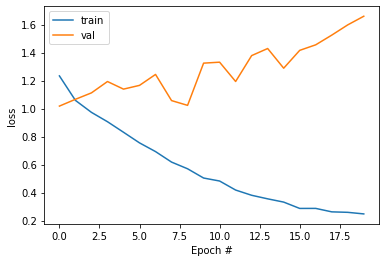

In [22]:
import matplotlib.pyplot as plt
# plot training history

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("Epoch #")
plt.ylabel("loss")
plt.legend()
plt.show()

### 5.4 Conclusión

Aunque hemos hecho varios intentos por no llegar a un módelo que haga overfitting, vemos en nuestra gráfica de la función de pérdidas, que mientras el error baja para el dataset de training, sube para validación, lo que nos indica que el módelo no es bueno para generalizar. Aprende muy bien el contenido de training, pero no es capaz de funcionar bien con contenido que no ha visto. Esto es una indicación de que los datos de train que hemos usado no son probablemente representativos para realizar este trabajo.  
El accuracy en validación nos indica que la mitad de las predicciones es correcta, con lo cual se comporta igual que si hiciésemos una predicción al azar. 

**Mejoras:**
- Solo hemos probado 2000 imágenes de un dataset inicial de 7220 imágenes. Tal vez con más imágenes podríamos obtener mejores resultados.
- Tal vez usando una estructura igual que la de imagenet, que dispone de una base de datos muy grande, podríamos usar inicialmente los pesos para entrenar la red, y así ser más facil la extracción de características de nuestro set. 
- Las imágenes que estamos usando, son mu variadas, y no tienen que estar identificadas con la casa propia, pueden ser de una ventana u otro elemento de la casa que no tenga peso a la hora de definir la calidad/precio de una casa.

Por todas estas razones es muy normal que tengamos resultado pésimos.

# 6 Cálculo del precio por regresión usando imágenes


### 6.1 Prepocesado de la variable target PRICE y disminución del dataset

In [23]:
# vamos a escalar nuestra variable Price para los tres grupos usando el valor máximo de   
# los precios que hay en el dataset de training
maxPrice = y_train_price.max()

y_train = y_train_price / maxPrice
y_val = y_val_price / maxPrice
y_test = y_test_price / maxPrice

In [24]:
y_train2000 = y_train[0:2000]
y_val300 = y_val[0:300]
y_test400 = y_test[0:400]

### 6.2 Probar en test el módelo con los mejores parámetros

In [26]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# dimensiones
n = ims_train2000.shape[1]
m = ims_train2000.shape[2]


# creamos la estructura de nuestro modelo
model = Sequential()


# primer bloque convolucional
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(n, m, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# seegundo bloque convolucional
model.add(Conv2D(32, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# tercer bloque convolucional
model.add(Conv2D(64, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# añadimos nuestro clasificador
model.add(Flatten())
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# compilamos el modelo
# usamos gradiente: Adam y función de pérdidas : categorical_crossentropy
opt = Adam(lr=1e-3, decay=1e-6)
model.compile(loss='mean_absolute_percentage_error', optimizer=opt)

# entrenamos el modelo
print("[INFO] training model...")
history = model.fit(ims_train2000, y_train2000,
          validation_data=(ims_val300, y_val300),
          epochs=40,
          batch_size=32)

[INFO] training model...
Epoch 1/40
63/63 [==============================] - 5s 80ms/step - loss: 677.8619 - val_loss: 83.2155
Epoch 2/40
63/63 [==============================] - 5s 76ms/step - loss: 443.6541 - val_loss: 60.7907
Epoch 3/40
63/63 [==============================] - 5s 77ms/step - loss: 320.7137 - val_loss: 64.9248
Epoch 4/40
63/63 [==============================] - 5s 77ms/step - loss: 287.5032 - val_loss: 91.5397
Epoch 5/40
63/63 [==============================] - 5s 76ms/step - loss: 218.0292 - val_loss: 53.6924
Epoch 6/40
63/63 [==============================] - 5s 77ms/step - loss: 184.8381 - val_loss: 66.7566
Epoch 7/40
63/63 [==============================] - 5s 76ms/step - loss: 154.9762 - val_loss: 60.0441
Epoch 8/40
63/63 [==============================] - 5s 77ms/step - loss: 121.6910 - val_loss: 63.5345
Epoch 9/40
63/63 [==============================] - 5s 77ms/step - loss: 108.2324 - val_loss: 47.4632
Epoch 10/40
63/63 [==============================] - 5s 7

In [27]:
# realizamos la predición para los datos de test
preds = model.predict(ims_test400)

# calculamos la diferencia entre la columna precio del dataset de test y el valor predicho
# calculamos el porcentage de diferencia, y nos quedamos con el valor absoluto
diff = preds.flatten() - y_test400
percentDiff = (diff / y_test400) * 100
absPercentDiff = np.abs(percentDiff)

# calculamos la media y la desviación estándar de los porcentages
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] avg. precio casa: €{}, std precio casa: €{}".format(
	(y_train_price[0:2000].mean()),	(y_train_price[0:2000].std())))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))
print("[INFO] se predice con un error de +/-: €{:.2f} ".format(np.mean(np.abs(diff))*maxPrice))

[INFO] avg. precio casa: €57.734, std precio casa: €39.18235409513084
[INFO] mean: 49.82%, std: 27.18%
[INFO] se predice con un error de +/-: €36.82 


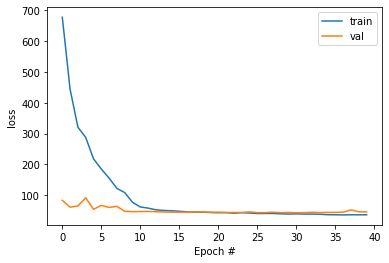

In [28]:
import matplotlib.pyplot as plt
# plot training history

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("Epoch #")
plt.ylabel("loss")
plt.legend()
plt.show()

### 6.3 Conclusión

Tengo que decir que estoy bastante sorprendida con el resultado de este módelo. Me sorprende que sólo mirando a las características de las imágenes pueda dar una predicción que se confunde en +/- 36€. Es un número grande! pero es que solo le estamos dando información de imágenes! .

En cuanto al modelo vemos que tiende a ir al overfitting, ya que cada vez aprende mejor con los datos de training, y no entanto la función de pérdida para validation, se mantiene constante, no mejora con mas entrenamiento. 

**Mejoras**
- Contar con mas datos, ya que estamos limitados a 2000 imágenes. 
- Posibilidad de crear detectores de imágenes que nos ayudarán a calificar mejor el dataset de imágenes para obtener mejor resultados.
- Probar más técnicas de regularización para ver si se puede mejorar el resultado.


# 7 Clasificación por precio (barato, moderado, caro) usando imágenes y datos númericos y categóricos.

### 7.1 Prepocesado de los datos

Vamos a usar las variables creadas en los modelos anteriores:

ims_train2000 , ims_val300, ims_test400    
y_train_price_onehot2000 , y_val_price_onehot300 , y_test_price_onehot400    
(ejecutar el punto 2 entero y 5.1 si el google colab crash)

Para los datos numéricos, tambien usamos solo los primeros 2000 registros y para ellos creamos las nuevas variables:    
X_train200 , X_val300 y X_test400   

In [35]:
# usamos los mismos numeros de elementos que para las imágenes
X_train2000 = X_train[0:2000]
X_val300 = X_val[0:300]
X_test400 = X_test[0:400]

### 7.2 Creación del modelo y ejecución con el set de test

In [36]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


Creamos la red neuronal para los datos numéricos y categóricos

In [37]:
#red neuronal para datos numéricos y categóricos
model_num = Sequential()

model_num.add(Dense(64, input_dim= X_train2000.shape[1],  activation="relu"))
model_num.add(Dense(32, activation="relu"))
model_num.add(Dense(16, activation="relu"))

Creamos la red neuronal convolucional para las imágenes.  
En este modelo es importante usar la capa de GlobalAveragePooling2D, para convertir nuestro array de arrays en un vector y que pueda ser combinado así con el modelo numérico+categórico.

In [38]:
# red neuronal para imágenes
# dimensiones
n = ims_train2000.shape[1]
m = ims_train2000.shape[2]
c = ims_train2000.shape[3]

# definimos nuestro input
input_mod = Input(shape=(n, m, c))

# primer bloque convolucional
x = Conv2D(16, kernel_size=(3,3))(input_mod)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# segundo bloque convolucional
x = Conv2D(32, kernel_size=(3,3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# tercer bloque convolucional
x = Conv2D(64, kernel_size=(3,3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)


# cuarto bloque convolucional
x = Conv2D(128, kernel_size=(3,3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)


# reducimos nuestro vector de 26 x 26 x 64 a 1 x 1 x 64
x = GlobalAveragePooling2D()(x)

# añadimos esta capa para tener el mismo número de nodos en los dos modelos (números e imágenes)
# para ayudar a balancear los datos de las dos ramas
x = Dense(16, activation="relu")(x)

model_ims = Model(inputs=input_mod, outputs= x)


Para una mayor regularización de la estructura, hemos usado una última capa en ambos módelos que cuente con el mismo número de neuronas, en este caso 16. 

In [36]:
# comprobación salida modelo
model_ims.output

<tf.Tensor 'dense_3/Identity:0' shape=(None, 16) dtype=float32>

In [31]:
# comprobación salida modelo
model_num.output

<tf.Tensor 'dense_4/Identity:0' shape=(None, 16) dtype=float32>

Realizamos la concatenación de los dos modelos y compilamos el modelo.


In [39]:
from tensorflow.keras.layers import concatenate
combinedInput = concatenate([model_num.output, model_ims.output])

x = Dense(8, activation='relu')(combinedInput)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)

combinedModel = Model(inputs=[model_num.input, model_ims.input], outputs= x)

opt = Adam(lr=1e-3, decay=1e-6)
combinedModel.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# entrenamos el modelo
print("[INFO] training model...")
history = combinedModel.fit(
	x=[X_train2000, ims_train2000], y= y_train_price_onehot2000,
	validation_data=([X_val300, ims_val300], y_val_price_onehot300),
	epochs=20, batch_size=32)


[INFO] training model...
Epoch 1/20
63/63 [==============================] - 6s 95ms/step - loss: 1.0745 - accuracy: 0.4235 - val_loss: 1.0712 - val_accuracy: 0.4467
Epoch 2/20
63/63 [==============================] - 5s 83ms/step - loss: 1.0341 - accuracy: 0.4610 - val_loss: 1.0185 - val_accuracy: 0.4467
Epoch 3/20
63/63 [==============================] - 5s 85ms/step - loss: 1.0262 - accuracy: 0.4545 - val_loss: 1.0080 - val_accuracy: 0.4533
Epoch 4/20
63/63 [==============================] - 5s 84ms/step - loss: 0.9909 - accuracy: 0.4915 - val_loss: 0.9559 - val_accuracy: 0.6100
Epoch 5/20
63/63 [==============================] - 5s 84ms/step - loss: 0.9566 - accuracy: 0.4755 - val_loss: 0.8883 - val_accuracy: 0.7367
Epoch 6/20
63/63 [==============================] - 5s 82ms/step - loss: 0.9015 - accuracy: 0.5650 - val_loss: 0.7720 - val_accuracy: 0.7367
Epoch 7/20
63/63 [==============================] - 5s 81ms/step - loss: 0.8186 - accuracy: 0.5895 - val_loss: 0.7149 - val_accur

Hize varias pruebas para el modelo convolucional, con 3 y 4 bloques : 

Con 3 bloques:      
 loss: 0.6558 - accuracy: 0.7080 - val_loss: 0.5807 - val_accuracy: 0.7533

Con 4 bloques:    
loss: 0.5989 - accuracy: 0.7425 - val_loss: 0.5395 - val_accuracy: 0.7700

Por lo que decidí dejar la cnn con una capa más.


In [40]:
combinedModel.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 222, 222, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 222, 222, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 222, 222, 16) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [41]:
# evaluamos el modelo
train_sc = combinedModel.evaluate(x=[X_train2000, ims_train2000], y=y_train_price_onehot2000, verbose=0)
test_sc = combinedModel.evaluate(x=[X_test400, ims_test400], y=y_test_price_onehot400, verbose=0)
print('Accuracy --> Train: %.3f, Test: %.3f' % (train_sc[1], test_sc[1]))
print('Loss --> Train: %.3f, Test: %.3f' % (train_sc[0], test_sc[0]))

Accuracy --> Train: 0.771, Test: 0.733
Loss --> Train: 0.527, Test: 0.656


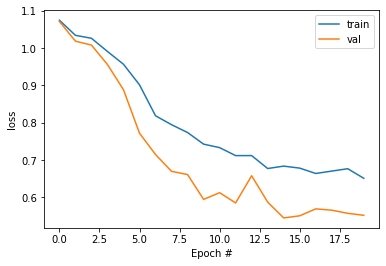

In [42]:
import matplotlib.pyplot as plt
# plot training history

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("Epoch #")
plt.ylabel("loss")
plt.legend()
plt.show()

### 7.3 Conclusiones

Los resultados de combinar imagenes con datos numéricos y categóricos empeoran con respecto a los valores de sólo numéricos, en donde obteníamos de acc 85% -> training y 82% -> test , mientras aqui bajamos a 77% -> training y 73% -> test.

Este resultado es normal, ya que el porcentaje usando solo imágenes era muy bajo (45 % -> test y 99 % -> train) 

Vemos que la función de pérdidas baja mas rapidamente para validación que para training. Probablemente es necesario mas entrenamiento para aprender, pero el google colab se bloquea si entreno con mas épocas.     
El hecho de la función de pérdida de validation esté por debajo de training, puede indicar que estamos en una situacion de underfitting, donde el entrenamiento no tiene suficientes datos para aprender bien. También puede ser una cuestión de buscar mejores hyperparámetros, que puedan definir una curca de pérdidas mas suave. 

# 8 Cálculo del precio por regresión usando imágenes y valores númericos & categóricos

### 8.1 Preprocesado de los datos

Vamos a usar las variables creadas en los modelos anteriores:

ims_train2000 , ims_val300, ims_test400
(ejecutar el punto 2 entero y 5.1 si el google colab crash)

Para los datos numéricos, tambien usamos solo los primeros 2000 registros y para ellos creamos las nuevas variables:
X_train200 , X_val300 y X_test400
y_train2000, y_val300 e y_test400

In [21]:
# usamos los mismos numeros de elementos que para las imágenes
X_train2000 = X_train[0:2000]
X_val300 = X_val[0:300]
X_test400 = X_test[0:400]

In [22]:
# normalizamos la variable Price
maxPrice2000 = y_train_price[0:2000].max()

y_train2000 = y_train_price[0:2000] / maxPrice2000
y_val300 = y_val_price[0:300] / maxPrice2000
y_test400 = y_test_price[0:400] / maxPrice2000

### 8.2 Creación del modelo y ejecución con el set de test

In [23]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tensorflow.keras.layers import concatenate

Creamos la red neuronal para los datos numéricos y categóricos

In [24]:
#red neuronal para datos numéricos y categóricos
model_num = Sequential()

model_num.add(Dense(64, input_dim= X_train2000.shape[1],  activation="relu"))
model_num.add(Dense(32, activation="relu"))
model_num.add(Dense(16, activation="relu"))

Creamos la red convolucional para las imágenes.    
En este modelo es importante usar la capa de GlobalAveragePooling2D, para convertir nuestro array de arrays en un vector y que pueda ser combinado así con el modelo numérico+categórico.

In [25]:
# red neuronal para imágenes
# dimensiones
n = ims_train2000.shape[1]
m = ims_train2000.shape[2]
c = ims_train2000.shape[3]

# definimos nuestro input
input_mod = Input(shape=(n, m, c))

# primer bloque convolucional
x = Conv2D(16, kernel_size=(3,3))(input_mod)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# segundo bloque convolucional
x = Conv2D(32, kernel_size=(3,3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# tercer bloque convolucional
x = Conv2D(64, kernel_size=(3,3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# cuarto bloque convolucional
x = Conv2D(128, kernel_size=(3,3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)


# reducimos nuestro vector de 26 x 26 x 64 a 1 x 1 x 64
x = GlobalAveragePooling2D()(x)

# añadimos esta capa para tener el mismo número de nodos en los dos modelos (números e imágenes)
# para ayudar a balancear los datos de las dos ramas
x = Dense(16, activation="relu")(x)

model_ims = Model(inputs=input_mod, outputs= x)


In [30]:
# usando los modelos del ejercicio anterior ahora solo modificamos la ultima capa para realizar el cálculo de la regresión
combinedInput = concatenate([model_num.output, model_ims.output])

x = Dense(8, activation='relu')(combinedInput)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)

combinedModel_r = Model(inputs=[model_num.input, model_ims.input], outputs= x)

opt = Adam(lr=1e-3, decay=1e-6)
combinedModel_r.compile(loss='mean_absolute_percentage_error', optimizer=opt)

# train the combinedModel
print("[INFO] training model...")
history = combinedModel_r.fit(
	x=[X_train2000, ims_train2000], y= y_train2000,
	validation_data=([X_val300, ims_val300], y_val300),
	epochs=20, batch_size=32)


[INFO] training model...
Epoch 1/20
63/63 [==============================] - 5s 85ms/step - loss: 100.9886 - val_loss: 125.9419
Epoch 2/20
63/63 [==============================] - 5s 81ms/step - loss: 40.2196 - val_loss: 36.0046
Epoch 3/20
63/63 [==============================] - 5s 81ms/step - loss: 35.4725 - val_loss: 28.1887
Epoch 4/20
63/63 [==============================] - 5s 80ms/step - loss: 34.5751 - val_loss: 26.7334
Epoch 5/20
63/63 [==============================] - 5s 81ms/step - loss: 34.6458 - val_loss: 27.8106
Epoch 6/20
63/63 [==============================] - 5s 80ms/step - loss: 34.2729 - val_loss: 27.4402
Epoch 7/20
63/63 [==============================] - 5s 81ms/step - loss: 34.6137 - val_loss: 27.5103
Epoch 8/20
63/63 [==============================] - 5s 81ms/step - loss: 34.5177 - val_loss: 30.5989
Epoch 9/20
63/63 [==============================] - 5s 80ms/step - loss: 34.1299 - val_loss: 28.5859
Epoch 10/20
63/63 [==============================] - 5s 79ms/ste

In [ ]:
4 bloques, penultimo 32 , ultimo 64
5s 72ms/step - loss: 100094.5391 - val_loss: 97186.6953
[INFO] avg. precio casa: €57.734, std precio casa: €39.18235409513084
[INFO] mean: €99.89%, std: €0.08%


4 bloques , 64 y 128 filtros
63/63 [==============================] - 5s 79ms/step - loss: 49369.9219 - val_loss: 2372.8301

[INFO] avg. precio casa: €57.734, std precio casa: €39.18235409513084
[INFO] mean: €30.67%, std: €25.21%


loss: 35.4563 - val_loss: 28.2143
- loss: 34.2910 - val_loss: 26.4997

In [33]:
# realizamos la predición para los datos de test
preds = combinedModel_r.predict([X_test400 , ims_test400])

# calculamos la diferencia entre la columna precio del dataset de test y el valor predicho
# calculamos el porcentage de diferencia, y nos quedamos con el valor absoluto
diff = preds.flatten() - y_test400
percentDiff = (diff / y_test400) * 100
absPercentDiff = np.abs(percentDiff)

# calculamos la media y la desviación estándar de los porcentages
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

print("[INFO] avg. precio casa: €{}, std precio casa: €{}".format(
	(y_train_price[0:2000].mean()),	(y_train_price[0:2000].std())))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))
print("[INFO] se predice con un error de +/-: €{:.2f} ".format(np.mean(np.abs(diff))*maxPrice2000))

[INFO] avg. precio casa: €57.734, std precio casa: €39.18235409513084
[INFO] mean: 32.10%, std: 25.18%
[INFO] se predice con un error de +/-: €22.60 


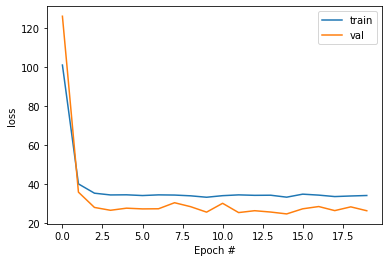

In [32]:
import matplotlib.pyplot as plt
# plot training history

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("Epoch #")
plt.ylabel("loss")
plt.legend()
plt.show()

### 8.3 Conclusiones

Me sorprende que la curva de pérdida en este caso, tiene una mejor tendencia que para clasificación. Pero si miramos a los resultados de los modelos por separado, el resultado de calcular el precio de un airbnb sólo con imágenes, no es tan malo que el de clasificación. 
Parece que rapidamente aprende en el dataset de training, pero el hecho de que validación esté por debajo, puede indicar que es mas facil predecir con el dataset de validation que con training. Sería ideal poder hacer la prueba con todo el dataset original, para tener conclusiones con mas peso.

El resultado de este modelo tiene una media de predicción de error de 23€ frente a los 14€ si solo usamos datos numéricos&categóricos y 37€ si usamos solo imágenes. 

También hay que tener en cuenta que hemos reducido el dataset a 2000 elementos debido a que la RAM de google colab no nos deja procesar mayor numero de registros.

# 9. Conclusiones Finales

Los módelos sólo con valores numéricos y categóricos dan mejores resultados que los módelos sólo con imágenes. Esto tiene sentido ya que las imágenes no son un factor determinante para el precio de una vivienda. Puede ser que un airbnb tenga una fotos muy buenas, que no sean reales, o que estén manipuladas por photoshop (me ha pasado en la vida real :P ) y no entanto la localización, prestaciones o el estado real del airbnb sea otro. 

Por otro lado la combinación de los datos numérico&categóricos + imágenes, empeora los resultados de los modelos. Esto es normal, aunque también puede ser debido a haber reducido el número de muestras y no haber podido realizar una búsqueda de hyperparámetros para esta arquitectura conjunta. 

En cuanto a los datos numéricos, respecto a las prácticas realizadas con anterioridad, hemos obtenido mejores resultados que con otros modelos de ML.

Respecto a las imágenes, hay muchas cosas que se pueden probar para mejorar los resultados. Entre ellas probad con arquitecturas prefabricadas, realizar una búsqueda de parámetros con gridsearch, para hacer un examen mas exhaustivo, y probar en una máquina que permita trabajar con todas las imágenes del dataset. 
